In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "F:\\ME_4thsem\\project\\PA\\3weld_new_dataset\\train"
validation_dir = "F:\\ME_4thsem\\project\\PA\\3weld_new_dataset\\test"
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 2417 images belonging to 3 classes.
Found 602 images belonging to 3 classes.


In [3]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [5]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(3, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [7]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(lr=0.0001),
#               metrics=["acc"])
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [8]:
234/20

11.7

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=28,  #2417 images = batch_size(20) * steps 
      epochs=15,
      validation_data=validation_generator,
      validation_steps=23,  #602 images = batch_size(10) * steps
      verbose=1)

Epoch 1/15
28/28 [==============================] - 25s 911ms/step - loss: 0.7340 - accuracy: 0.7000 - val_loss: 0.6140 - val_accuracy: 0.6870
Epoch 2/15
28/28 [==============================] - 22s 768ms/step - loss: 0.2179 - accuracy: 0.9214 - val_loss: 0.2207 - val_accuracy: 0.9565
Epoch 3/15
28/28 [==============================] - 21s 766ms/step - loss: 0.1561 - accuracy: 0.9482 - val_loss: 0.0939 - val_accuracy: 0.9739
Epoch 4/15
28/28 [==============================] - 22s 785ms/step - loss: 0.1290 - accuracy: 0.9500 - val_loss: 0.1468 - val_accuracy: 0.9304
Epoch 5/15
28/28 [==============================] - 20s 724ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.0990 - val_accuracy: 0.9478
Epoch 6/15
28/28 [==============================] - 20s 717ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0562 - val_accuracy: 0.9870
Epoch 7/15
28/28 [==============================] - 19s 666ms/step - loss: 0.0591 - accuracy: 0.9856 - val_loss: 0.0424 - val_accuracy: 0.9826

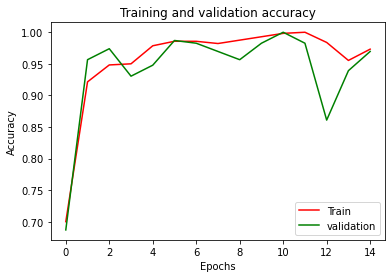

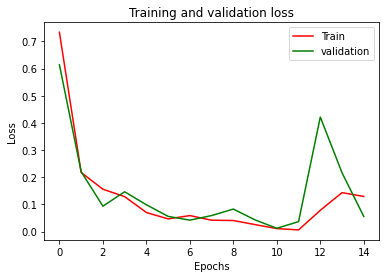

In [10]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, color='r', label = 'Train')
plt.plot(epochs, val_acc, color='g', label = 'validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs'),plt.ylabel('Accuracy')
plt.legend()
plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss, color='r', label = 'Train')
plt.plot(epochs, val_loss, color='g', label = 'validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs'),plt.ylabel('Loss')
plt.legend()

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
img_path = "F:\\ME_4thsem\\project\\PA\\3weld_new_dataset\\test\\good_weld_test\\frame_00910.png"
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255

y = model.predict(x)

In [14]:
import numpy as np
print("The loaded image belonged to the class",y)

The loaded image belonged to the class [[0. 1. 0.]]
